## Template files

In [ ]:
# Templates - Python - Operator File Import
import bpy

def read_some_data(context, filepath, use_some_setting):
    print("running read_some_data...")
    f = open(filepath, "r", encoding="utf-8")
    data = f.read()
    f.close()

    # would normally load the data here
    print(data)

    return {'FINISHED'}


# ImportHelper is a helper class, defines filename and
# invoke() function which calls the file selector.
from bpy_extras.io_utils import ImportHelper
from bpy.props import StringProperty, BoolProperty, EnumProperty
from bpy.types import Operator


class ImportSomeData(Operator, ImportHelper):
    """This appears in the tooltip of the operator and in the generated docs"""
    bl_idname = "import_test.some_data"  # important since its how bpy.ops.import_test.some_data is constructed
    bl_label = "Import Some Data"

    # ImportHelper mix-in class uses this.
    filename_ext = ".txt"

    filter_glob: StringProperty(
        default="*.txt",
        options={'HIDDEN'},
        maxlen=255,  # Max internal buffer length, longer would be clamped.
    )

    # List of operator properties, the attributes will be assigned
    # to the class instance from the operator settings before calling.
    use_setting: BoolProperty(
        name="Example Boolean",
        description="Example Tooltip",
        default=True,
    )

    type: EnumProperty(
        name="Example Enum",
        description="Choose between two items",
        items=(
            ('OPT_A', "First Option", "Description one"),
            ('OPT_B', "Second Option", "Description two"),
        ),
        default='OPT_A',
    )

    def execute(self, context):
        return read_some_data(context, self.filepath, self.use_setting)


# Only needed if you want to add into a dynamic menu.
def menu_func_import(self, context):
    self.layout.operator(ImportSomeData.bl_idname, text="Text Import Operator")


# Register and add to the "file selector" menu (required to use F3 search "Text Import Operator" for quick access).
def register():
    bpy.utils.register_class(ImportSomeData)
    bpy.types.TOPBAR_MT_file_import.append(menu_func_import)


def unregister():
    bpy.utils.unregister_class(ImportSomeData)
    bpy.types.TOPBAR_MT_file_import.remove(menu_func_import)


if __name__ == "__main__":
    register()

    # test call
    # bpy.ops.import_test.some_data('INVOKE_DEFAULT')


## Test Bpy Gallery

In [1]:
import bpy
bpy.app.version_string # current blender version

'4.5.3 LTS'

In [2]:
import databpy as db
db.__file__

'd:\\Miniconda311\\Lib\\site-packages\\databpy\\__init__.py'

In [3]:
# setup for the docs

import runpy # Helper functions just for the docs
module = runpy.run_path("docs/render_utils.py")
globals().update(module)


import sys
from pathlib import Path
#subprocess.check_call([sys.executable, "-m", "pip", "install", "polars"])
#subprocess.check_call([sys.executable, "-m", "pip", "install", "databpy"])

# Set render resolution
bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

def camera_from_above():
    camera = bpy.context.scene.camera
    camera.location = (6, 4, 10)  # Position above the XY plane
    camera.rotation_euler = (0, 0, 0)  # Rotate to look at XY plane
    # Set the camera to orthographic mode
    camera.data.type = 'ORTHO'
    # Set the orthographic scale to 12
    camera.data.ortho_scale = 9

    bpy.context.scene.render.resolution_x = 300
    bpy.context.scene.render.resolution_y = 300

# use local databpy
project_root = Path.home() / "projects/databpy/"
sys.path.append(str(project_root))

In [4]:
node_group_name = "gn_place_spheres"
blend_file = "docs/cube_gn_position.blend"
node_group_place_spheres = db.nodes.append_from_blend(node_group_name, blend_file)

for node in node_group_place_spheres.nodes:
    print(node.name)

Group Input
Group Output
Instance on Points
UV Sphere


SinglePoint


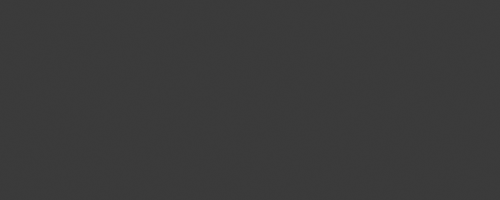

In [5]:
fresh_scene()

import numpy as np
single_vertex = np.array([[6, 4, 0]])

# Create a mesh object with the single vertex
my_point_obj = db.create_object(single_vertex, name="SinglePoint")

# Print the name of the created object
print(my_point_obj.name)

render_result()

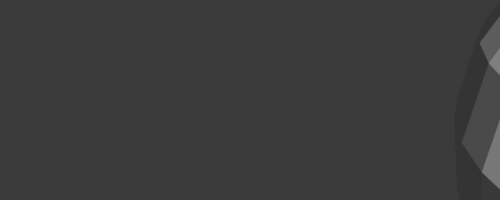

In [11]:
my_point_obj.modifiers["GeometryNodes"]["Socket_2"] = 4 # set radius
render_result()